<a href="https://colab.research.google.com/github/hongdaestreet/Data-Analysis-Basic-/blob/main/14_EDA(%EB%8C%80%ED%95%99%EA%B8%B0%EC%88%99%EC%82%AC_%EC%88%98%EC%9A%A9%ED%98%84%ED%99%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,599 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

Text(0.5, 1.0, '한글')

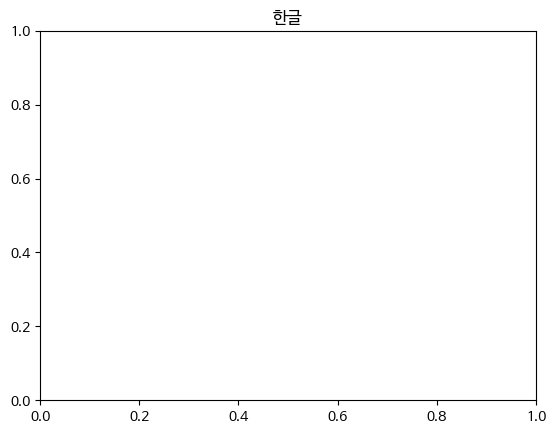

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.title('한글')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/PNU/3-2/데이터분석입문(겨울)/기숙사수용현황_2022.xlsx')
df

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991
1147,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,307,1370,745,직영(구내),새로암학사,2002
1148,2022,대학교,사립,경기,기존,화성의과학대학교,374,10,104,0,직영(구내),본관동,2005


In [5]:
# 열명 확인
df.columns

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재학생수', '총실수', '수용가능인원',
       '지원자수', '구분', '건물명', '준공연도'],
      dtype='object')

In [7]:
# 학교 종류가 대학교이고 설립구분이 사립, 국립인 경우
df = df[(df['학교종류'] == '대학교') & (df['설립구분'].isin(['사립','국립']))]
# # query 활용법
# df = df.query('(학교종류 == '대학교') and (설립구분) in['사립','국립']')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    1063 non-null   int64 
 1   학교종류    1063 non-null   object
 2   설립구분    1063 non-null   object
 3   지역      1063 non-null   object
 4   상태      1063 non-null   object
 5   학교      1063 non-null   object
 6   재학생수    1063 non-null   int64 
 7   총실수     1063 non-null   int64 
 8   수용가능인원  1063 non-null   int64 
 9   지원자수    1063 non-null   int64 
 10  구분      1061 non-null   object
 11  건물명     1061 non-null   object
 12  준공연도    1063 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 116.3+ KB


In [8]:
# 기숙사 수용률 구하기 : 수용가능인원/재학생수*100 -> 소수점2자리 표시
df['수용률'] = np.round(df['수용가능인원']/df['재학생수']*100,2)
df.head()

<ipython-input-8-a4d5061f0053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['수용률'] = np.round(df['수용가능인원']/df['재학생수']*100,2)


,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95


In [9]:
# 입사경쟁률 : 지원자수/수용가능인원*100
df['입사경쟁률'] = np.round(df['지원자수']/df['수용가능인원']*100,2)
df.head()

<ipython-input-9-d0ee9766cdef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['입사경쟁률'] = np.round(df['지원자수']/df['수용가능인원']*100,2)


,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00


In [10]:
# 준공연수 구하기 : 기준연도 - 준공연도
df['준공연수'] = df['기준연도'] - df['준공연도']
df.head()

<ipython-input-10-fd37949cd060>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['준공연수'] = df['기준연도'] - df['준공연도']


,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93,19
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58,3
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26,9
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00,15


In [11]:
# null 결측치 개수 확인
df.isnull().sum()

기준연도      0
학교종류      0
설립구분      0
지역        0
상태        0
학교        0
재학생수      0
총실수       0
수용가능인원    0
지원자수      0
구분        2
건물명       2
준공연도      0
수용률       0
입사경쟁률     2
준공연수      0
dtype: int64

In [12]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1145    0
1146    0
1147    0
1148    0
1149    0
Length: 1063, dtype: int64

In [13]:
df[df['구분'].isnull()]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
63,2022,대학교,사립,서울,기존,경기대학교 _제2캠퍼스,2595,0,0,0,NaN,NaN,0,0.0,NaN,2022
729,2022,대학교,사립,전북,기존,예원예술대학교,1062,0,0,0,NaN,NaN,0,0.0,NaN,2022


In [14]:
# NaN 데이터 삭제
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준연도    1061 non-null   int64  
 1   학교종류    1061 non-null   object 
 2   설립구분    1061 non-null   object 
 3   지역      1061 non-null   object 
 4   상태      1061 non-null   object 
 5   학교      1061 non-null   object 
 6   재학생수    1061 non-null   int64  
 7   총실수     1061 non-null   int64  
 8   수용가능인원  1061 non-null   int64  
 9   지원자수    1061 non-null   int64  
 10  구분      1061 non-null   object 
 11  건물명     1061 non-null   object 
 12  준공연도    1061 non-null   int64  
 13  수용률     1061 non-null   float64
 14  입사경쟁률   1061 non-null   float64
 15  준공연수    1061 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 140.9+ KB


In [15]:
# 최종 Null 반영여부 확인
df[df['구분'].isnull()]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수


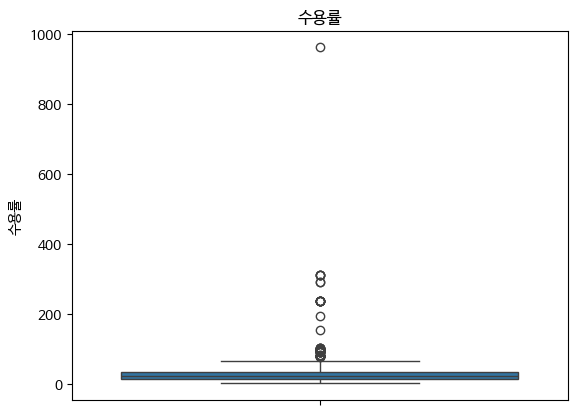

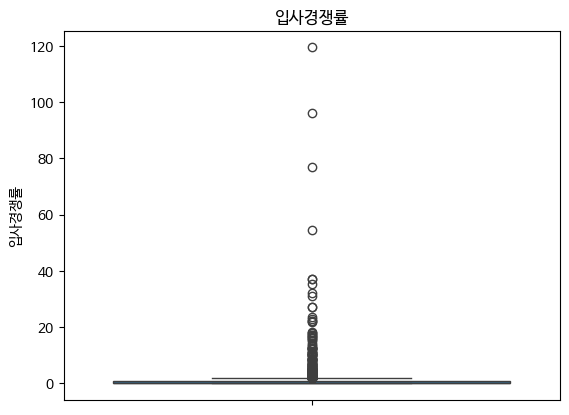

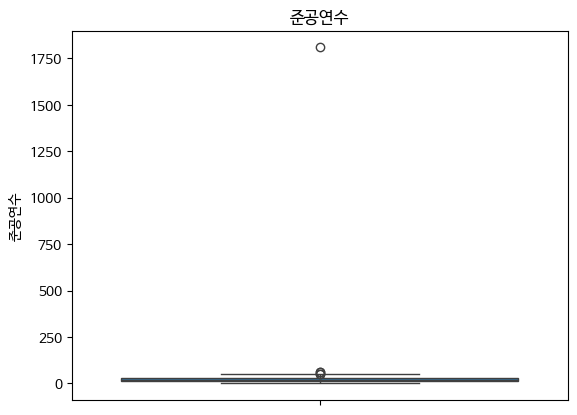

In [16]:
import seaborn as sns
col = ['수용률', '입사경쟁률', '준공연수']
for c in col:
    sns.boxplot(data = df[c])
    plt.title(c)
    plt.show()

In [17]:
df['수용률'].describe()

count    1061.000000
mean       32.856607
std        44.607242
min         1.950000
25%        14.100000
50%        23.340000
75%        34.900000
max       961.110000
Name: 수용률, dtype: float64

In [18]:
df[df['수용률']>900]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
346,2022,대학교,사립,세종,기존,대전가톨릭대학교,54,186,519,1,직영(구내),비배섬관,1995,961.11,0.19,27


In [19]:
# 수용률이 100 이하인 학교만 사용
df = df[df['수용률']<100]
df

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
1,2022,대학교,사립,경남,기존,가야대학교(김해),1869,80,642,6,직영(구내),군자관,2003,34.35,0.93,19
2,2022,대학교,사립,경기,기존,가천대학교,20650,98,3087,18,직영(구외),의과대학 기숙사,2019,14.95,0.58,3
3,2022,대학교,사립,경기,기존,가천대학교,20650,40,3087,8,직영(구외),송도BRC학생생활관,2013,14.95,0.26,9
4,2022,대학교,사립,경기,기존,가천대학교,20650,184,3087,0,직영(구내),제1학생생활관,2007,14.95,0.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016,13.16,96.10,6
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991,24.95,22.19,31
1147,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,307,1370,745,직영(구내),새로암학사,2002,24.95,54.38,20
1148,2022,대학교,사립,경기,기존,화성의과학대학교,374,10,104,0,직영(구내),본관동,2005,27.81,0.00,17


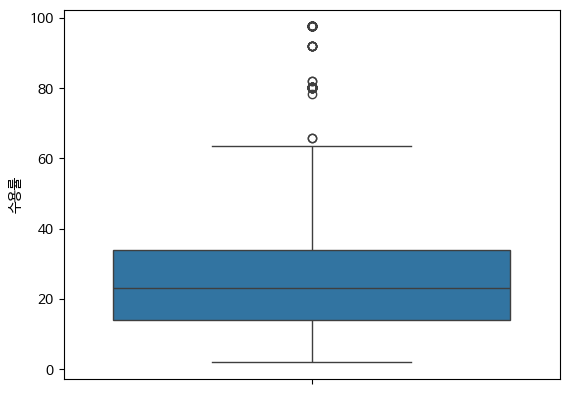

In [20]:
sns.boxplot(data = df['수용률'])
plt.show()

In [21]:
# 입사경쟁률이 1 초과인 학교
df[df['입사경쟁률']>1]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
0,2022,대학교,사립,경남,기존,가야대학교(김해),1869,88,642,15,직영(구내),여자 기숙사,2009,34.35,2.34,13
16,2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,401,52,182,8,임차,마리아의 집,2001,45.39,4.40,21
17,2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,401,39,182,10,직영(구내),요셉의 집,2010,45.39,5.49,12
41,2022,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,5565,320,2620,269,임차,가온관,2016,47.08,10.27,6
43,2022,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,5565,124,2620,356,직영(구외),도원관,2009,47.08,13.59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,2022,대학교,사립,서울,기존,홍익대학교,14022,69,1845,122,직영(구내),기숙사(남자),1988,13.16,6.61,34
1144,2022,대학교,사립,서울,기존,홍익대학교,14022,36,1845,51,직영(구내),기숙사(여자),1988,13.16,2.76,34
1145,2022,대학교,사립,서울,기존,홍익대학교,14022,551,1845,1773,직영(구내),제2기숙사,2016,13.16,96.10,6
1146,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,5491,94,1370,304,직영(구내),두루암학사,1991,24.95,22.19,31


In [22]:
# 준공연수 이상치 데이터
df[df['준공연수']>=100]

,기준연도,학교종류,설립구분,지역,상태,학교,재학생수,총실수,수용가능인원,지원자수,구분,건물명,준공연도,수용률,입사경쟁률,준공연수
84,2022,대학교,국립,대구,기존,경북대학교,24779,212,5936,103,민자(BTL),명의관,212,23.96,1.74,1810


In [23]:
df.loc[84, '준공연도'] = 2012

In [24]:
# 준공연수 재계산
df['준공연수'] = df['기준연도'] - df['준공연도']

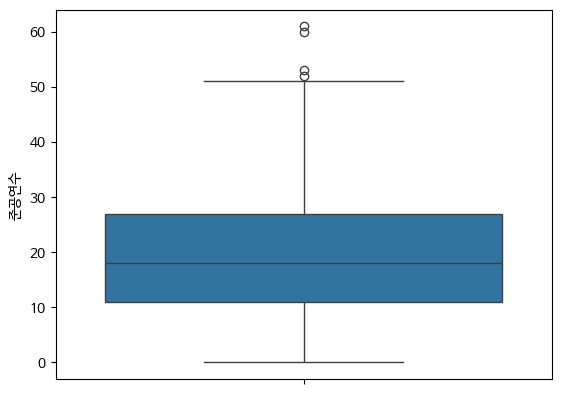

In [25]:
sns.boxplot(data=df['준공연수'])
plt.show()

In [26]:
# 기준연도와 준공연도 category 형식의 범주형 자료로 변경
df['기준연도'] = df['기준연도'].astype('category')
df['준공연도'] = df['준공연도'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   기준연도    1040 non-null   category
 1   학교종류    1040 non-null   object  
 2   설립구분    1040 non-null   object  
 3   지역      1040 non-null   object  
 4   상태      1040 non-null   object  
 5   학교      1040 non-null   object  
 6   재학생수    1040 non-null   int64   
 7   총실수     1040 non-null   int64   
 8   수용가능인원  1040 non-null   int64   
 9   지원자수    1040 non-null   int64   
 10  구분      1040 non-null   object  
 11  건물명     1040 non-null   object  
 12  준공연도    1040 non-null   category
 13  수용률     1040 non-null   float64 
 14  입사경쟁률   1040 non-null   float64 
 15  준공연수    1040 non-null   int64   
dtypes: category(2), float64(2), int64(5), object(7)
memory usage: 158.8+ KB


In [27]:
# 상관관계 분석
df.corr()

<ipython-input-27-4dc7e35ead57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
재학생수,1.000000,0.227336,0.733932,0.052193,-0.385501,-0.081152,-0.050548
총실수,0.227336,1.000000,0.303365,0.288581,0.016972,0.127340,-0.251463
수용가능인원,0.733932,0.303365,1.000000,0.022747,0.189966,-0.114586,0.018156
지원자수,0.052193,0.288581,0.022747,1.000000,-0.052407,0.851962,-0.117531
수용률,-0.385501,0.016972,0.189966,-0.052407,1.000000,-0.049724,0.139440
입사경쟁률,-0.081152,0.127340,-0.114586,0.851962,-0.049724,1.000000,-0.077778
준공연수,-0.050548,-0.251463,0.018156,-0.117531,0.139440,-0.077778,1.000000


In [28]:
plt.rcParams['axes.unicode_minus']= False

<ipython-input-29-1a9e564452b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)  # 수치값 표현


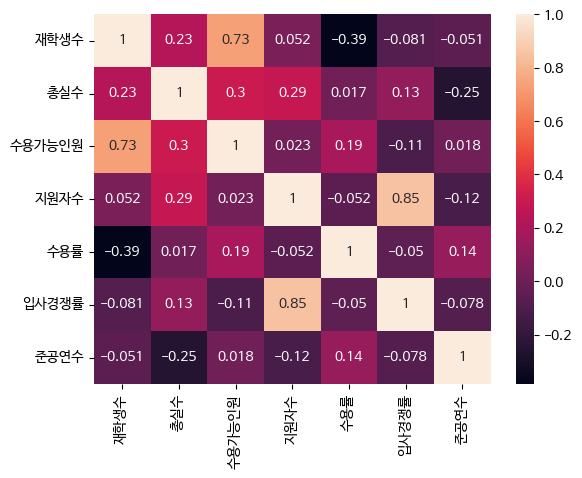

In [29]:
sns.heatmap(df.corr(), annot=True)  # 수치값 표현
plt.show()

In [30]:
# 학교, 설립구분, 지역별 그룹 : key로 반영됨
dfg = df.groupby(['학교','설립구분','지역']).mean()
dfg

<ipython-input-30-9f6a7eb32c4e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(['학교','설립구분','지역']).mean()


,,,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
학교,설립구분,지역,,,,,,,
가야대학교(김해),사립,경남,1869.0,84.000000,642.0,10.500000,34.35,1.635000,16.000000
가천대학교,사립,경기,20650.0,163.285714,3087.0,4.428571,14.95,0.142857,9.000000
가톨릭관동대학교,사립,강원,6947.0,109.000000,2955.0,0.000000,42.54,0.000000,24.285714
가톨릭꽃동네대학교,사립,충북,401.0,45.500000,182.0,9.000000,45.39,4.945000,16.500000
가톨릭대학교,사립,경기,7430.0,218.500000,1242.0,1.000000,16.72,0.080000,8.500000
...,...,...,...,...,...,...,...,...,...
호남신학대학교,사립,광주,791.0,129.000000,284.0,105.000000,35.90,36.970000,12.000000
호서대학교,사립,충남,12897.0,246.000000,3537.0,16.200000,27.42,0.458000,7.200000
홍익대학교,사립,서울,14022.0,116.714286,1845.0,340.571429,13.16,18.458571,22.142857


In [31]:
# 학교, 설립구분, 지역별 그룹 : key를 열값으로 전환
dfg = dfg.reset_index()
dfg

,학교,설립구분,지역,재학생수,총실수,수용가능인원,지원자수,수용률,입사경쟁률,준공연수
0,가야대학교(김해),사립,경남,1869.0,84.000000,642.0,10.500000,34.35,1.635000,16.000000
1,가천대학교,사립,경기,20650.0,163.285714,3087.0,4.428571,14.95,0.142857,9.000000
2,가톨릭관동대학교,사립,강원,6947.0,109.000000,2955.0,0.000000,42.54,0.000000,24.285714
3,가톨릭꽃동네대학교,사립,충북,401.0,45.500000,182.0,9.000000,45.39,4.945000,16.500000
4,가톨릭대학교,사립,경기,7430.0,218.500000,1242.0,1.000000,16.72,0.080000,8.500000
...,...,...,...,...,...,...,...,...,...,...
187,호남신학대학교,사립,광주,791.0,129.000000,284.0,105.000000,35.90,36.970000,12.000000
188,호서대학교,사립,충남,12897.0,246.000000,3537.0,16.200000,27.42,0.458000,7.200000
189,홍익대학교,사립,서울,14022.0,116.714286,1845.0,340.571429,13.16,18.458571,22.142857
190,홍익대학교 _제2캠퍼스,사립,세종,5491.0,200.500000,1370.0,524.500000,24.95,38.285000,25.500000


<ipython-input-32-51c72d2934ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)   # 수치값 표현


<Axes: >

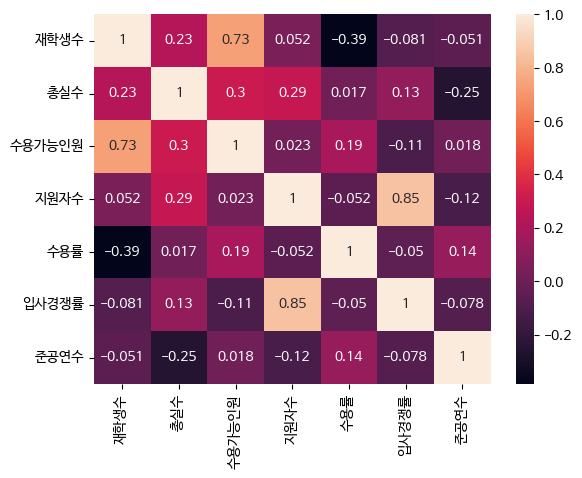

In [32]:
# 학교별 평균 반영된 corr
sns.heatmap(df.corr(),annot=True)   # 수치값 표현

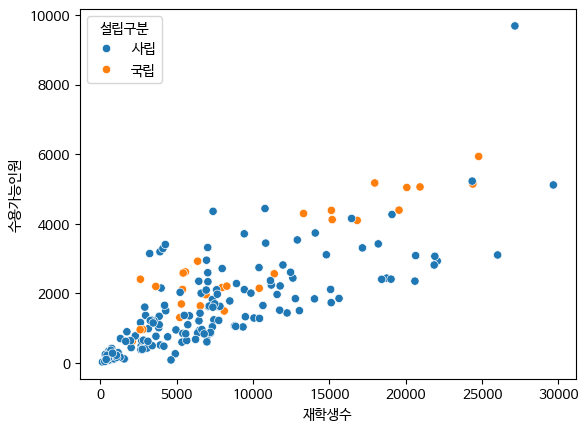

In [33]:
# 재학생수와 수용가능인원 관계
sns.scatterplot(x='재학생수', y='수용가능인원', hue='설립구분', data=dfg)
plt.show()

In [34]:
# 준공연수 재분류
dfg['준공구분'] = np.where(dfg['준공연수'] <= 10, '10년이하', np.where(dfg['준공연수']<=20, '11~20년이하', '20년초과'))
dfg['준공구분'].unique()

array(['11~20년이하', '10년이하', '20년초과'], dtype=object)

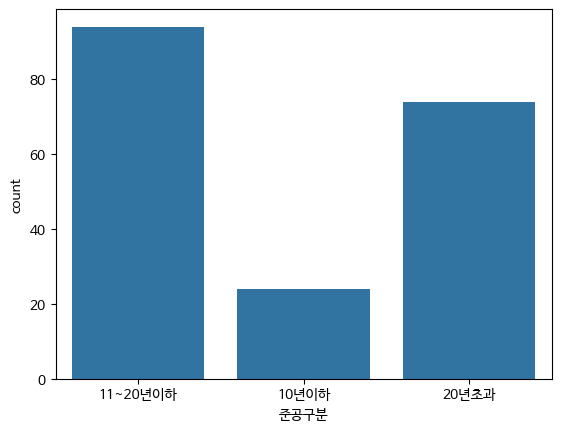

In [35]:
sns.countplot(x='준공구분', data=dfg)   # 순위 임의 지정
plt.show()

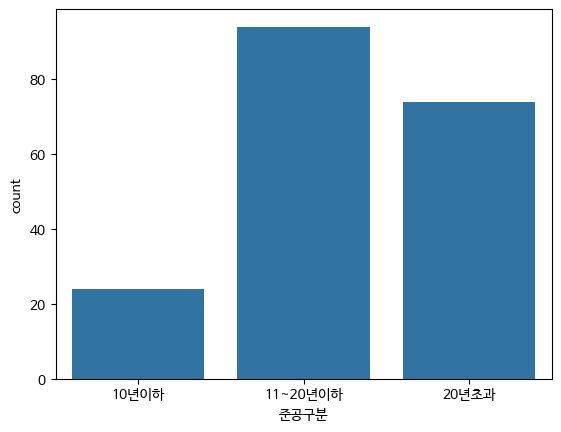

In [36]:
sns.countplot(x = '준공구분', order = ['10년이하', '11~20년이하', '20년초과'], data=dfg)
plt.show()

In [37]:
dfg.columns

Index(['학교', '설립구분', '지역', '재학생수', '총실수', '수용가능인원', '지원자수', '수용률', '입사경쟁률',
       '준공연수', '준공구분'],
      dtype='object')

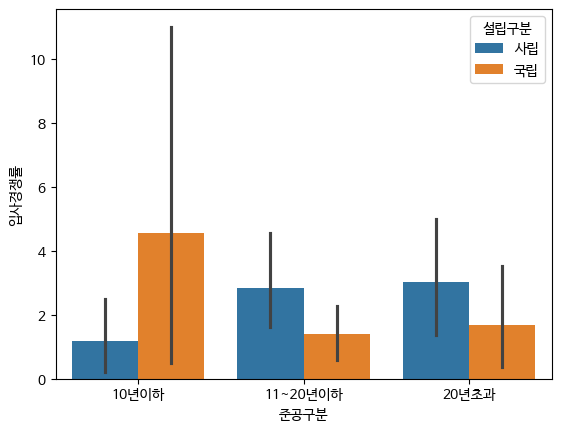

In [38]:
# 입사경쟁률
sns.barplot(x='준공구분', y='입사경쟁률', hue='설립구분', order=['10년이하', '11~20년이하', '20년초과'], data=dfg)
plt.show()

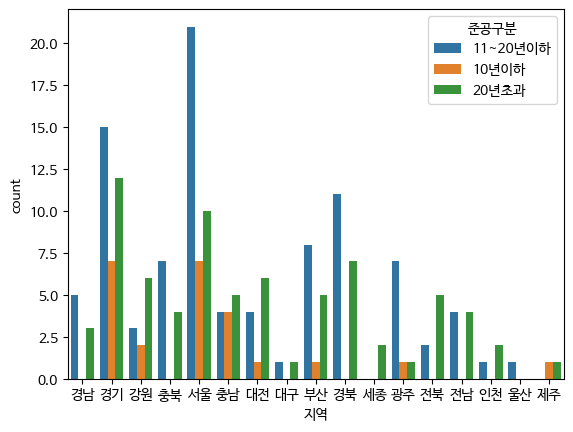

In [39]:
# 지역별, 준공구분
sns.countplot(x='지역', hue='준공구분', data=dfg)
plt.show()

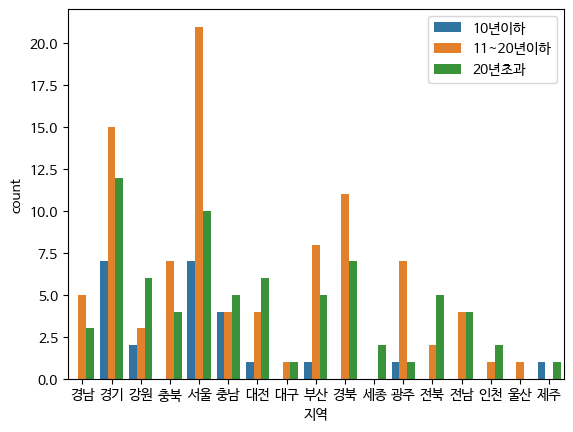

In [40]:
# 지역별, 준공구분: hue 옵션 지정
sns.countplot(x='지역', hue='준공구분', hue_order =['10년이하', '11~20년이하', '20년초과'],  data=dfg)
plt.legend(loc = 'upper right')
plt.show()